In [ ]:
!gdown https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420938113-1629952094/mvtec_anomaly_detection.tar.xz

Downloading...
From: https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420938113-1629952094/mvtec_anomaly_detection.tar.xz
To: /content/mvtec_anomaly_detection.tar.xz
100% 5.26G/5.26G [00:46<00:00, 113MB/s]


In [ ]:
!tar -xvf /content/mvtec_anomaly_detection.tar.xz

hazelnut/train/good/157.png
hazelnut/train/good/158.png
hazelnut/train/good/159.png
hazelnut/train/good/161.png
hazelnut/train/good/162.png
hazelnut/train/good/163.png
hazelnut/train/good/164.png
hazelnut/train/good/170.png
hazelnut/train/good/171.png
hazelnut/train/good/172.png
hazelnut/train/good/173.png
hazelnut/train/good/174.png
hazelnut/train/good/175.png
hazelnut/train/good/176.png
hazelnut/train/good/177.png
hazelnut/train/good/178.png
hazelnut/train/good/179.png
hazelnut/train/good/180.png
hazelnut/train/good/181.png
hazelnut/train/good/182.png
hazelnut/train/good/183.png
hazelnut/train/good/184.png
hazelnut/train/good/165.png
hazelnut/train/good/166.png
hazelnut/train/good/167.png
hazelnut/train/good/168.png
hazelnut/train/good/169.png
hazelnut/train/good/160.png
hazelnut/train/good/153.png
hazelnut/train/good/152.png
hazelnut/train/good/129.png
hazelnut/train/good/130.png
hazelnut/train/good/131.png
hazelnut/train/good/132.png
hazelnut/train/good/133.png
hazelnut/train/good/

In [ ]:
l

['helper.py', 'dataloader.py', 'model.py', '__pycache__', 'constants.py']

In [ ]:
import shutil
pth ="/content/VisualInspection/utils/"
l =os.listdir(pth)
for i in l: 
   shutil.copy(pth+"constants.py","/content/utils")

In [ ]:
!pip install Pillow==8.3.2
!pip install scikit-learn==0.24.2
!pip install torch==1.9.0
!pip install torchvision==0.10.0
!pip install nb-black==1.0.7
!pip install numpy==1.20.1
!pip install matplotlib==3.3.4
!pip install seaborn==0.11.1

In [ ]:
!git clone https://github.com/OlgaChernytska/Visual-Inspection.git

Cloning into 'Visual-Inspection'...
remote: Enumerating objects: 110, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 110 (delta 2), reused 0 (delta 0), pack-reused 104
Receiving objects: 100% (110/110), 329.09 MiB | 34.51 MiB/s, done.
Resolving deltas: 100% (48/48), done.
Checking out files: 100% (24/24), done.


In [ ]:
%load_ext autoreload
%autoreload 2
%load_ext lab_black

ModuleNotFoundError: ignored

In [ ]:
os.listdir("/content/utils")

['helper.py', 'dataloader.py', 'model.py', 'constants.py']

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

from utils.dataloader import get_train_test_loaders, get_cv_train_test_loaders
from utils.model import CustomVGG
from utils.helper import train, evaluate, predict_localize
from utils.constants import NEG_CLASS 
from utils.constants import INPUT_IMG_SIZE as input_size

## Parameters

In [ ]:
data_folder = "/content"
subset_name = "leather"
data_folder = os.path.join(data_folder, subset_name)

batch_size = 10
target_train_accuracy = 0.98
lr = 0.0001
epochs = 10
class_weight = [1, 3] if NEG_CLASS == 1 else [3, 1]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

heatmap_thres = 0.7
n_cv_folds = 5

# Data

In [ ]:
train_loader, test_loader = get_train_test_loaders(
    root=data_folder, batch_size=batch_size, test_size=0.2, random_state=42,
)

Dataset /content/leather: N Images = 369, Share of anomalies = 0.249


# Model Training

In [ ]:
model = CustomVGG()

class_weight = torch.tensor(class_weight).type(torch.FloatTensor).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weight)
optimizer = optim.Adam(model.parameters(), lr=lr)

In [ ]:
model = train(
    train_loader, model, optimizer, criterion, epochs, device, target_train_accuracy
)

In [ ]:
model_path = f"/content/VisualInspection/weights/{subset_name}_model.h5"
torch.save(model, model_path)
# model = torch.load(model_path, map_location=device)

# Evaluation

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


Accuracy: 0.8243
Balanced Accuracy: 0.8474



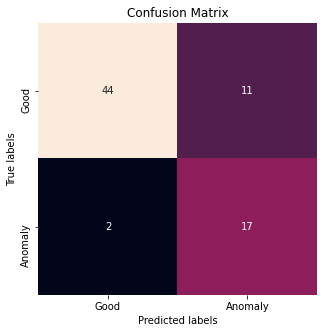

In [ ]:
evaluate(model, test_loader, device)

# Cross Validation

In [ ]:
cv_folds = get_cv_train_test_loaders(
    root=data_folder,
    batch_size=batch_size,
    n_folds=n_cv_folds,
)

class_weight = torch.tensor(class_weight).type(torch.FloatTensor).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weight)

for i, (train_loader, test_loader) in enumerate(cv_folds):
    print(f"Fold {i+1}/{n_cv_folds}")
    model = CustomVGG(input_size)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    model = train(train_loader, model, optimizer, criterion, epochs, device)
    evaluate(model, test_loader, device)

# Visualization

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


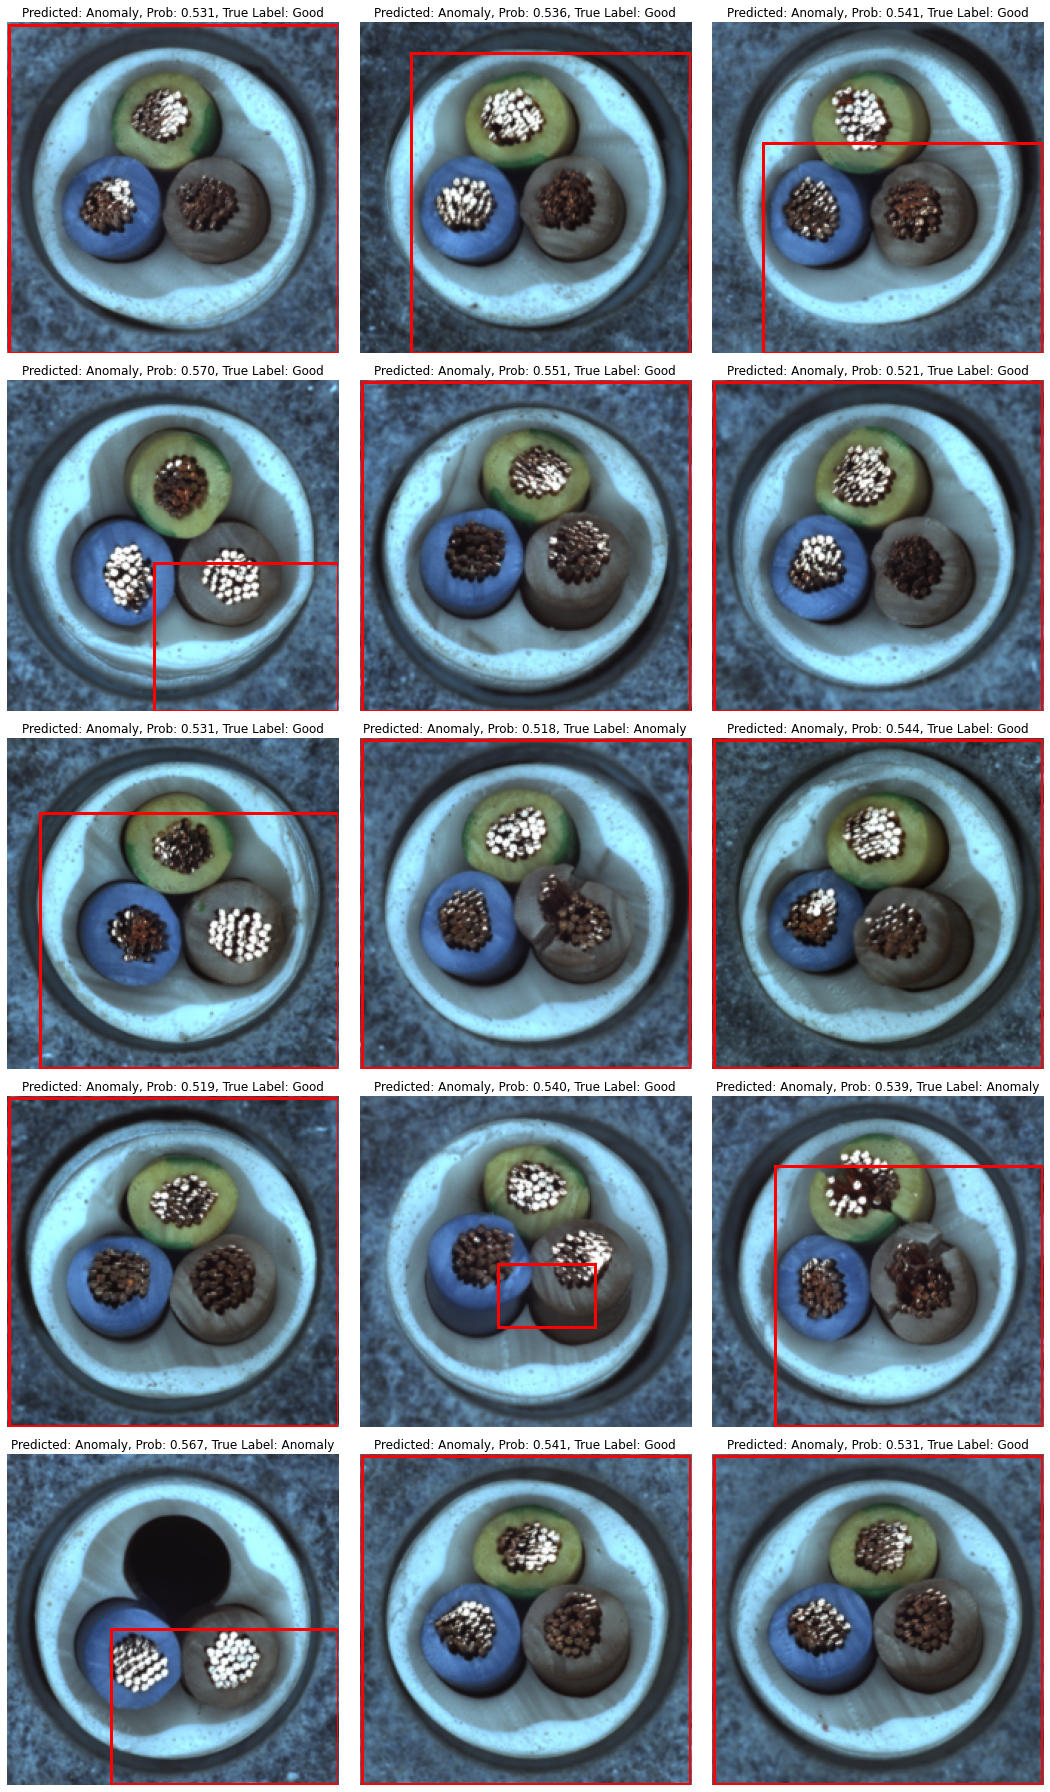

In [ ]:
predict_localize(
    model, test_loader, device, thres=heatmap_thres, n_samples=15, show_heatmap=False
)